In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt
from ncempy.io import dm
from concurrent.futures import ThreadPoolExecutor
import numpy as np

from pacbedclient import query

In [3]:
pacbed1 = dm.dmReader("../../tests/pacbed_files/rutile_80kV_1.dm4")
pacbed2 = dm.dmReader("../../tests/pacbed_files/rutile_80kV_2.dm4")

params = dict(
    crystal_structure='Rutile',
    acceleration_voltage=80000,
    convergence_angle=20,
    zone_u=0, zone_v=0, zone_w=1,
    host='localhost',
    port='8230'
)

In [4]:
expected1 = query(image_array=pacbed1['data'], **params)
expected2 = query(image_array=pacbed2['data'], **params)

In [5]:
def do_test(expected, image_array, params):
    result = query(image_array=image_array, **params)
    return (expected, result)

In [33]:
# create a storm of concurrent requests with different data
futures1 = []
futures2 = []
with ThreadPoolExecutor() as executor:
    for i in range(20):
        futures1.append(executor.submit(do_test, expected1, image_array=pacbed1['data'], params=params))
        futures2.append(executor.submit(do_test, expected2, image_array=pacbed2['data'], params=params))


In [34]:
results1 = [f.result() for f in futures1]
results2 = [f.result() for f in futures2]

In [35]:
def validate(results):
    all_true = True
    for r in results:
        print(r[0]['thickness'], r[1]['thickness'])
        same = np.allclose(r[0]['validation'], r[1]['validation'])
        all_true = all_true and same
        print(same)
    print(all_true)

In [36]:
validate(results1)
print('---')
validate(results2)

170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
170.0 170.0
True
True
---
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
260.0 260.0
True
True


In [31]:
def validate_plot(n, arr):
    fig, axes = plt.subplots(4, 3, sharex=True, sharey=True)
    for i in range(4):
        axes[i, 0].imshow(arr[n][0]['validation'][..., i])
        axes[i, 1].imshow(arr[n][1]['validation'][..., i])
        axes[i, 2].imshow((arr[n][0]['validation'] - arr[n][1]['validation'])[..., i])

<IPython.core.display.Javascript object>


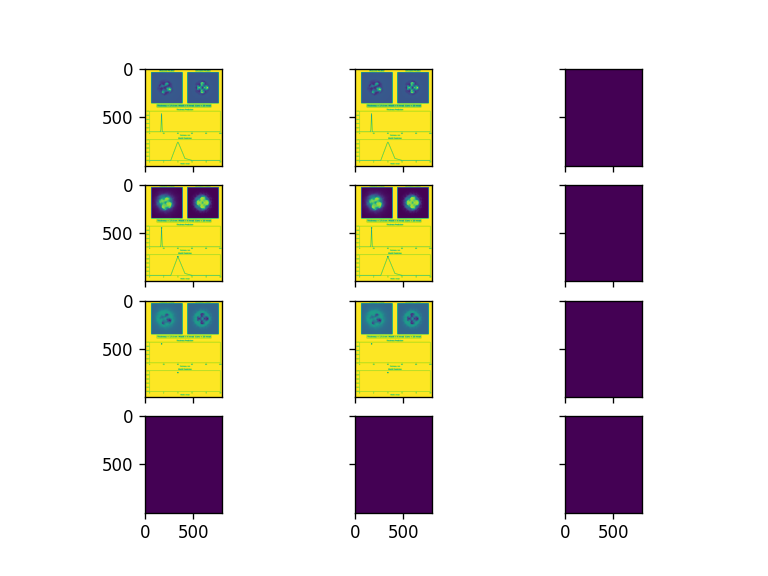

In [32]:
validate_plot(2, results1)